# Tarea 1 - EL4203-1
### Tomas Barros 
### 20.816.832-0

## Preguntas Teóricas

a) ¿Qué es un paradigma en la programación?

Un paradigma ne la programación es la forma en la que modelamos el problema que queremos resolver. 
Existen 2 tipos de paradigmas, imperativo y declarativo.
En el paradigma imperativo, el código está relacionado con la arquitectura de la máquina, y son una secuencia de pasos (o instrucciones) que cambian el estado del programa. Existen 3 tipos de paradigmas imperativos, 'procedimental', 'orientado a objetos', y 'procesamiento paralelo'.


b) ¿En qué se basa la programación orientada a objetos?

Se basa en un programa hecho de clases, con sus métodos y atributos.
Una clase describre un grupo de objetos que compartirán propiedades y métodos comúnes. La creación de un programa involucrará ensamblar los objetos, y hacerlos interactuar entre ellos.


c) ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big 𝑂?

Iteración es cuando se utiliza un ciclo 'for' o 'while'
en el programa, y el mismo procedimiento se repite varias veces. Generalmente tienen notación 𝑂(n^i), donde i depende de la cantidad de ciclos o bucles anidados del programa.

Recursividad es cuando una función se llama a si misma directa o indirectamente. La idea es resolver problemas más pequeños a partir de un caso base, para luego usar la respuesta de esos para resolver el problema más grande. Su notación en big 𝑂 puede variar dependiendo del programa y algoritmo utilizado, y es más complejo determinar su notación con respecto a iteración.


d) Explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)

La diferencia de rendimiento es que 𝑂(1) es de tiempo constante, mientras que 𝑂(n) es de tiempo lineal (depende de la entrada). 
Un algoritmo 𝑂(1) es uno donde, independientemente de la entrada, se ejecuta 1 sola vez. Un ejemplo de esto puede ser un 'print()'. Un algoritmo 𝑂(n) es uno que se ejecutará n veces. Un ejemplo de esto es un ciclo 'for', ya que el programa se ejecutará n veces.


e) ¿Cómo se calcula el orden en un programa que funciona por etapas?

Primero se evalúa cada etapa por separado y se calcula su complejidad. Luego, la complejidad del programa será la etapa más lenta, ya que esa domina el tiempo de ejecución.
Para el ejemplo visto en clases:

n = 8

i = 1

while (i < n):

  print(f"Hey - I'm busy looking at: {i}")

  i *= 2
  

Las lineas de código 'n=8' e 'i=1' son 𝑂(1), mientras que el 'While' es 𝑂(log(n)). Como el más lento es el while, domina en el tiempo de ejecución, y por lo tanto el programa es de orden 𝑂(log(n)).


f) ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?

Establecer la ecuación de recurrencia y luego utilizar el teorema maestro.
La ecuación de recurrencia es:
$$T(n) = pT(\frac{n}{q}) + Cn^{r}$$
El teorema maestro es: 

$T(n) = 𝑂(n^{r})$ si $p < q^{r}$

$T(n) = 𝑂(n^{r}log(n))$ si $p = q^{r}$

$T(n) = 𝑂(n^{log_{q}(p)})$ si $p > q^{r}$



## Caminos en una PCB

Lo que se pide es una clase que permita calcular la cantidad posible de caminos entre los puntos A y B de una PCB de tamaño NxM. 
Imaginemos una grilla de tamaño NxM como un conjunto de celdas, y solo podemos movernos hacia abajo y hacia la derecha (pues son los unicos movimientos válidos que nos permiten acercarnos a B desde A). 
Ahora, si tenemos tamaño N en las filas y tamaño M en columnas, significa que tenemos N-1 movimientos máximos hacia abajo, y M-1 movimientos máximos hacia la derecha.
Definamos los conjuntos:

n = ${n_1,n_2,...,n_{N-1}}$

m = ${m_1,m_2,...,m_{M-1}}$

Como conjuntos de movimientos ordenados, donde el orden para cada conjunto es $n_1$ -> $n_2$ -> ... -> $n_{N-1}$ y $m_1$ -> $m_2$ -> ... -> $m_{M-1}$. Es decir, el movimiento $n_2$ solo puede realizarse si se hizo previamente el movimiento $n_1$. Esto es debido a que estoy considerando moverse desde un punto de la grilla a otro como un elemento $n_i$, y por lo tanto, si miramos la grilla como forma matricial, y queremos movernos desde el punto (1,0) al (2,0), entonces es lógico pensar que primero hubo que moverse desde el (0,0) al (1,0), si partimos desde el punto A en la esquina superior izquiera (punto (0,0)).

De esta forma, el problema termina resultando en encontrar las posibles formas de ordenar ambos conjuntos entre si, manteniendo el orden interno que tiene cada uno de estos. Esto puede mirarse como: 
Dado un conjunto ordenado n, colocar k elementos del conjunto ordenado m, en los espacios y alrededor de los elementos del conjunto n. Una vez ordenados todos los elementos de m, tendremos un total de (N-1) + (M-1) elementos, lo que da lugar a un total de N + M - 2 posiciones. De esas (N + M - 2) posiciones, sabemos que (N-1) ya están ocupadas por los elementos de n, y por lo tanto, las otras (M-1) posiciones serán ocupadas por los elementos de m. De esta forma, el problema es ver de cuantas formas diferentes podemos seleccionar (M-1) posiciones de un total de (N + M - 2), para colocar los elementos de m.
Esto es la siguiente ecuación:

$$ Caminos = \frac{(N+M-2)!}{(M-1)!(N-1)!}$$

In [18]:
#------------------------------------------------------------------------------------------------------
#Primero haré el primer metodo, luego en otro bloque de código el segundo, y al final recopilaré los 2
#------------------------------------------------------------------------------------------------------

def factorial(x):
    if x > 0:
        return x*factorial(x-1)
    else:
        return 1

class pcb1:
    def __init__(self,N,M):
        self.N = N # Filas
        self.M = M # Columnas
    
    def caminos_con_permutacion(self):
        a = factorial(self.N+self.M-2)
        b = factorial(self.N-1)
        c = factorial(self.M-1)
        return a/(b*c)

In [19]:
a = pcb1(4,3)
b = a.caminos_con_permutacion()
print(b)

10.0


Otra forma de obtener la cantidad de caminos posibles sería utilizar la lógica de arboles binarios. Como sabemos, solo podemos movernos hacia la derecha o hacia abajo debido a las condiciones de simplificación del problema. Entonces definiendo un arbol binario, donde las ramas de la derecha significan moverse hacia la derecha, y las ramas de la izquierda significan moverse hacia abajo, entonces podemos generar un arbol binario que represente los caminos posibles a seguir en la grilla. Una condicion que debe tener este arbol binario es que cada nodo solo puede tener un padre y un hijo, para cumplir la condición de que no nos devolvemos por el camino, y para que el arbol tenga sentido. Por lo tanto, estaríamos generando un arbol de tamaño (N-1)+(M-1), con una unica rama. La idea es entonces contar la cantidad posible de arboles distintos que se podrían generar, entregando entonces los caminos posibles de ir desde A hacia B en la PCB.

In [35]:
class pcb2:
    def __init__(self, N, M):
        self.N = N  # Filas (mov abajo)
        self.M = M  # Columnas (mov derecha)

    def caminos_arbol(self,abj=0,der=0):
        if abj == self.N - 1 and der == self.M - 1: # Cuando llegamos al punto B => Camino encontrado
            return 1 # => Se suma 1 (para contar el camino)
        if abj == self.N - 1: # Si estamos en la ultima fila => solo podemos ir hacia la derecha
            return self.caminos_arbol(abj, der + 1)
        if der == self.M - 1: # Si estamos en la ultima columna => solo podemos ir hacia abajo
            return self.caminos_arbol(abj + 1, der)
        return self.caminos_arbol(abj, der + 1) + self.caminos_arbol(abj + 1, der) # Se cuenta la cantidad total de caminos

In [37]:
c = pcb2(4, 3)
d = c.caminos_arbol()
print(d)

10


Ahora para mirar el tiempo de ejecución de cada metodo, importamos la librería 'time' de matlab, y basta con guardar el tiempo inicial, ejecutar la funcion, y definir el tiempo de ejecucion como el 'tiempo despues de la ejecucion'  - 'tiempo inicial'

In [ ]:
def tiempoFuncion(function):
    def wrapper(*args, **kwargs):
        import time
        inicio = time.time() # Tiempo inicial de la funcion
        resultado = function(*args, **kwargs) # Se ejecuta la funcion
        total = time.time() - inicio # Tiempo al finalizar la funcion
        print(total, 'segundos' )
        return resultado,total 
    return wrapper

### El codigo final es:

In [11]:
import time

def factorial(x): # Funcion para calcular metodo 1
    if x > 0:
        return x*factorial(x-1)
    else:
        return 1
        
class PCB:
    def __init__(self,N,M):
        self.N = N
        self.M = M
        
    def tiempoEjecucion(function): # Funcion para calcular tiempo de ejecución
        def wrapper(*args, **kwargs):
            inicio = time.time() # Tiempo inicial de la funcion
            resultado = function(*args, **kwargs)
            total = time.time() - inicio # Tiempo al finalizar la funcion
            return resultado,total
        return wrapper

    @tiempoEjecucion
    def caminos_con_permutacion(self):
        time.sleep(1)
        a = factorial(self.N+self.M-2)
        b = factorial(self.N-1)
        c = factorial(self.M-1)
        return int(a/(b*c))
    
    @tiempoEjecucion
    def caminos_con_arbol(self):
        time.sleep(1)
        def caminos_arbol(abj=0,der=0):
            if abj == self.N - 1 and der == self.M - 1: # Cuando llegamos al punto B => Camino encontrado
                return 1 # => Se suma 1 (para contar el camino)
            if abj == self.N - 1: # Si estamos en la ultima fila => solo podemos ir hacia la derecha
                return caminos_arbol(abj, der + 1)
            if der == self.M - 1: # Si estamos en la ultima columna => solo podemos ir hacia abajo
                return caminos_arbol(abj + 1, der)
            return caminos_arbol(abj, der + 1) + caminos_arbol(abj + 1, der) # Se cuenta la cantidad total de caminos
        return caminos_arbol() 

    
    def caminos(self,x):
        if x == 1:
            return self.caminos_con_permutacion()
        elif x == 2:
            return self.caminos_con_arbol()
        else:
            print("Método no encontrado")

In [12]:
# Prueba
a = PCB(4,3)
b = a.caminos(1)
c = a.caminos(2)
print(b)
print(c)

(10, 1.0008137226104736)
(10, 1.0009710788726807)


Ahora solo falta generar gráficos para distintos inputs de PCB, para los 2 métodos distintos.

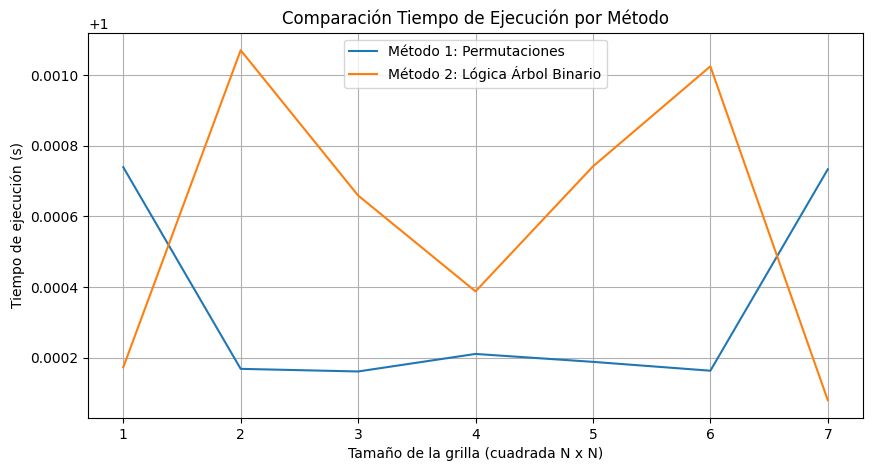

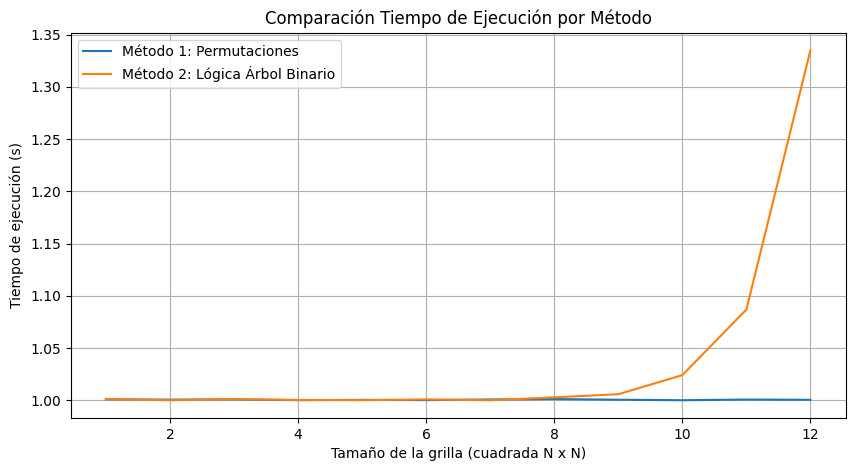

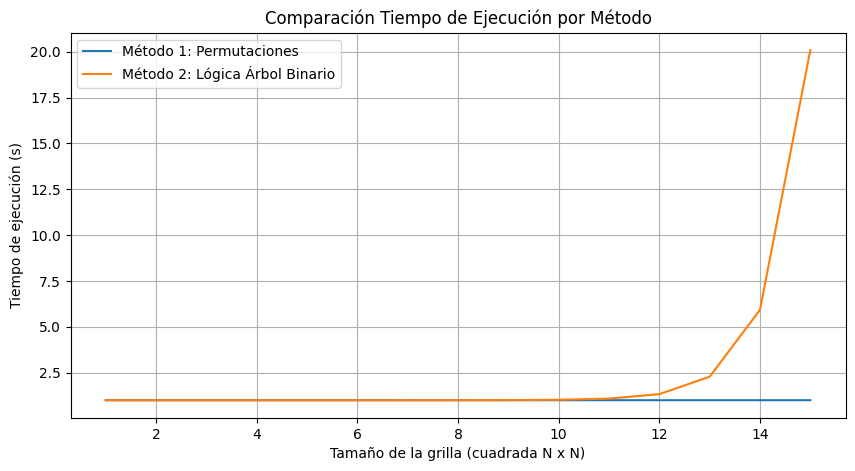

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def medir_tiempos(a,b):
    ns = range(a, b)  # Valores de N y M (serán grillas cuadradas de tamaño NxN máximo por simplicidad)
    tiempos1 = []
    tiempos2 = []
    for n in ns:
        pcb = PCB(n, n)
        resultado1, t1 = pcb.caminos(1)
        resultado2, t2 = pcb.caminos(2)
        tiempos1.append(t1)
        tiempos2.append(t2)
    
    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(ns, tiempos1, label='Método 1: Permutaciones')
    plt.plot(ns, tiempos2, label='Método 2: Lógica Árbol Binario')
    plt.xlabel('Tamaño de la grilla (cuadrada N x N)')
    plt.ylabel('Tiempo de ejecución (s)')
    plt.title('Comparación Tiempo de Ejecución por Método')
    plt.legend()
    plt.grid(True)
    plt.show()



medir_tiempos(1,8)
medir_tiempos(1,13)
medir_tiempos(1,16)